# Trabalho de Algoritmos e Estrutura de Dados
## Problema da Mochila Binária

## Importando as dependências

In [1]:
from datetime import datetime
import pandas as pd
import seaborn as sns

## Definindo o parâmetros do problema

In [2]:
dados = {"importancia": [60, 100, 120, 50],
         "valor": [10, 20, 30, 50]}
valor_disponivel = 50

# dados = {"importancia": [10, 21, 50, 51],
#          "valor": [2, 3, 5, 6],
#          "selecionado": [0, 0, 0, 0]}
# valor_disponivel = 7
itens = pd.DataFrame(dados)

# valor_disponivel = 6200000
# itens = pd.read_excel("proposicoes_STI_2023.xlsx", sheet_name="Tratado")
# itens = itens.filter(["Ação", "GUT", "Unidade Total"]).rename(columns={"Ação": "acao", "GUT": "importancia",
#                                                                        "Unidade Total": "valor"})
itens["importancia_por_valor"] = itens.importancia / itens.valor
itens["proporcao"] = 0

Exibindo o conteúdo dos 5 primeiros registros

In [3]:
itens.head()

,importancia,valor,importancia_por_valor,proporcao
0,60,10,6.0,0
1,100,20,5.0,0
2,120,30,4.0,0
3,50,50,1.0,0


Inicializa o DataFrame que conterá as estatísticas

In [4]:
estatisticas = pd.DataFrame(columns=["algoritmo", "inicio_processamento", "fim_processamento", "tempo_processamento", "importancia_maxima", "valor_maximo", "itens_selecionados", "itens_rejeitados"])

## Algoritmos Exatos
---

### Branch and Bound

O método Branch and bound, proposto por A. H. Land e A. G. Doig em 1960, é um algoritmo para encontrar soluções ótimas para vários problemas de otimização, especialmente em otimização combinatória. Consiste em uma enumeração sistemática de todos os candidatos a solução, através da qual grandes subconjuntos de candidatos infrutíferos são descartados em massa utilizando os limites superior e inferior da quantia otimizada.

Importando a classe que implementa o algoritmo

In [5]:
from algoritmos_exatos import BranchAndBoundKnapsack

Solucionando o problema para o conjunto de dados especificado

In [6]:
inicio_processamento = datetime.now()
print("Início do processamento:", inicio_processamento)

knapsack = BranchAndBoundKnapsack(valor_disponivel, itens)
itens_retornados = knapsack.solucionar()

fim_processamento = datetime.now()
tempo_processamento = fim_processamento - inicio_processamento
print("Fim do processamento:", fim_processamento)
print("Tempo de processamento:", tempo_processamento)

Início do processamento: 2022-09-16 11:55:19.139043
Fim do processamento: 2022-09-16 11:55:19.155046
Tempo de processamento: 0:00:00.016003


In [7]:
print("Algoritmo utilizado:", knapsack)
importancia_maxima = itens_retornados.query('proporcao == 1').importancia.sum()
valor_maximo = itens_retornados.query('proporcao == 1').valor.sum()
print(f"Importância máxima obtida: {importancia_maxima}")
print(f"Valor máximo obtido: R${valor_maximo:0.2f}")

Algoritmo utilizado: Branch and Bound
Importância máxima obtida: 220
Valor máximo obtido: R$50.00


Itens selecionados


In [8]:
itens_selecionados = itens_retornados.query("proporcao == 1")
itens_selecionados

,importancia,valor,importancia_por_valor,proporcao
1,100,20,5.0,1
2,120,30,4.0,1


Itens rejeitados

In [9]:
itens_rejeitados = itens_retornados.query("proporcao == 0")
itens_rejeitados

,importancia,valor,importancia_por_valor,proporcao
0,60,10,6.0,0
3,50,50,1.0,0


Compilando as estastísticas do algoritmo

In [10]:
dicionario_estatistica = {"algoritmo": [str(knapsack)],
                          "inicio_processamento": [inicio_processamento],
                          "fim_processamento": [fim_processamento],
                          "tempo_processamento": [tempo_processamento.total_seconds() * 1000],
                          "importancia_maxima": [importancia_maxima],
                          "valor_maximo": [valor_maximo],
                          "itens_selecionados": [len(itens_selecionados)],
                          "itens_rejeitados": [len(itens_rejeitados)]}

estatistica = pd.DataFrame(dicionario_estatistica)
estatisticas = pd.concat([estatisticas, estatistica], ignore_index=True)

## Algoritmos Aproximados
---

### Algoritmo Guloso

Algoritmo guloso é técnica de projeto de algoritmos que tenta resolver o problema fazendo a escolha localmente ótima em cada fase com a esperança de encontrar um ótimo global.

Na solução de alguns problemas combinatórios a estratégia gulosa pode assegurar a obtenção de soluções ótimas, o que não é muito comum. No entanto, quando o problema a ser resolvido pertencer à classe NP-completo ou NP-difícil, a estratégia gulosa torna-se atrativa para a obtenção de solução aproximada em tempo polinomial.

Importando a classe que implementa o algoritmo

In [11]:
from algoritmos_aproximados import GreedyKnapsack

Solucionando o problema para o conjunto de dados especificado

In [12]:
inicio_processamento = datetime.now()
print("Início do processamento:", inicio_processamento)

knapsack = GreedyKnapsack(valor_disponivel, itens)
itens_retornados = knapsack.solucionar()

fim_processamento = datetime.now()
tempo_processamento = fim_processamento - inicio_processamento
print("Fim do processamento:", fim_processamento)
print("Tempo de processamento:", tempo_processamento)

Início do processamento: 2022-09-16 11:55:19.455114
Fim do processamento: 2022-09-16 11:55:19.457115
Tempo de processamento: 0:00:00.002001


In [13]:
print("Algoritmo utilizado:", knapsack)
importancia_maxima = itens_retornados.query('proporcao == 1').importancia.sum()
valor_maximo = itens_retornados.query('proporcao == 1').valor.sum()
print(f"Importância máxima obtida: {importancia_maxima}")
print(f"Valor máximo obtido: R${valor_maximo:0.2f}")

Algoritmo utilizado: Algoritmo Guloso
Importância máxima obtida: 280
Valor máximo obtido: R$60.00


Itens selecionados

In [14]:
itens_selecionados = itens_retornados.query("proporcao == 1")
itens_selecionados

,importancia,valor,importancia_por_valor,proporcao
0,60,10,6.0,1
1,100,20,5.0,1
2,120,30,4.0,1


Itens rejeitados

In [15]:
itens_rejeitados = itens_retornados.query("proporcao == 0")
itens_rejeitados

,importancia,valor,importancia_por_valor,proporcao
3,50,50,1.0,0


Compilando as estastísticas do algoritmo

In [16]:
dicionario_estatistica = {"algoritmo": [str(knapsack)],
                          "inicio_processamento": [inicio_processamento],
                          "fim_processamento": [fim_processamento],
                          "tempo_processamento": [tempo_processamento.total_seconds() * 1000],
                          "importancia_maxima": [importancia_maxima],
                          "valor_maximo": [valor_maximo],
                          "itens_selecionados": [len(itens_selecionados)],
                          "itens_rejeitados": [len(itens_rejeitados)]}

estatistica = pd.DataFrame(dicionario_estatistica)
estatisticas = pd.concat([estatisticas, estatistica], ignore_index=True)

### Busca Tabu
A Busca Tabu, algoritmo proposto por Glover na sua forma atual em 1986, é uma Meta-heurística, ou procedimento adaptativo auxiliar, que guia um algoritmo de busca local na exploração contínua dentro de um espaço de busca. Aqui a implementação tenta melhorar o resultado obtido a partir de uma heurística gulosa.

A partir de uma solução inicial, que pode ser escolhida de acordo com algum dentre vários critérios possíveis, tenta avançar, a cada iteração, para uma outra solução (melhor que a anterior) não aceitando movimentos que levem a soluções já visitadas, que permanecem em uma lista tabu.

Essa lista permanece na memória, durante determinado espaço de tempo ou certo número de iterações sem que haja melhora na solução(prazo tabu), opção esta adotada nessa implementação (prazo tabu = 50 iterações).

Importando a classe que implementa o algoritmo

In [17]:
from algoritmos_aproximados import TabuSearchKnapsack

Solucionando o problema para o conjunto de dados especificado

In [18]:
inicio_processamento = datetime.now()
print("Início do processamento:", inicio_processamento)

knapsack = TabuSearchKnapsack(valor_disponivel, itens)
itens_retornados = knapsack.solucionar()

fim_processamento = datetime.now()
tempo_processamento = fim_processamento - inicio_processamento
print("Fim do processamento:", fim_processamento)
print("Tempo de processamento:", tempo_processamento)

Início do processamento: 2022-09-16 11:55:19.711204
Fim do processamento: 2022-09-16 11:55:19.732208
Tempo de processamento: 0:00:00.021004


In [19]:
print("Algoritmo utilizado:", knapsack)
importancia_maxima = itens_retornados.query('proporcao == 1').importancia.sum()
valor_maximo = itens_retornados.query('proporcao == 1').valor.sum()
print(f"Importância máxima obtida: {importancia_maxima}")
print(f"Valor máximo obtido: R${valor_maximo:0.2f}")

Algoritmo utilizado: Busca Tabu
Importância máxima obtida: 220
Valor máximo obtido: R$50.00


Itens selecionados

In [20]:
itens_selecionados = itens_retornados.query("proporcao == 1")
itens_selecionados

,importancia,valor,importancia_por_valor,proporcao
1,100,20,5.0,1
2,120,30,4.0,1


Itens rejeitados

In [21]:
itens_rejeitados = itens_retornados.query("proporcao == 0")
itens_rejeitados

,importancia,valor,importancia_por_valor,proporcao
0,60,10,6.0,0
3,50,50,1.0,0


Compilando as estastísticas do algoritmo

In [22]:
dicionario_estatistica = {"algoritmo": [str(knapsack)],
                          "inicio_processamento": [inicio_processamento],
                          "fim_processamento": [fim_processamento],
                          "tempo_processamento": [tempo_processamento.total_seconds() * 1000],
                          "importancia_maxima": [importancia_maxima],
                          "valor_maximo": [valor_maximo],
                          "itens_selecionados": [len(itens_selecionados)],
                          "itens_rejeitados": [len(itens_rejeitados)]}

estatistica = pd.DataFrame(dicionario_estatistica)
estatisticas = pd.concat([estatisticas, estatistica], ignore_index=True)

## Estatísticas
---

### Estatísticas coletadas

In [23]:
estatisticas

,algoritmo,inicio_processamento,fim_processamento,tempo_processamento,importancia_maxima,valor_maximo,itens_selecionados,itens_rejeitados
0,Branch and Bound,2022-09-16 11:55:19.139043,2022-09-16 11:55:19.155046,16.003,220,50,2,2
1,Algoritmo Guloso,2022-09-16 11:55:19.455114,2022-09-16 11:55:19.457115,2.001,280,60,3,1
2,Busca Tabu,2022-09-16 11:55:19.711204,2022-09-16 11:55:19.732208,21.004,220,50,2,2


### Gráficos

Importância máxima obtida

<AxesSubplot:xlabel='algoritmo', ylabel='importancia_maxima'>

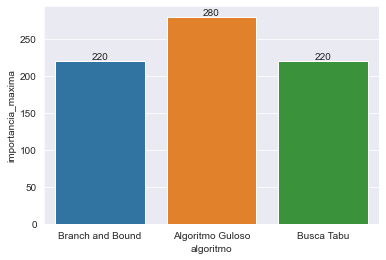

In [24]:
ax = sns.barplot(x="algoritmo", y="importancia_maxima", data=estatisticas)
ax.bar_label(ax.containers[0])
ax

Valor máximo obtido

<AxesSubplot:xlabel='algoritmo', ylabel='valor_maximo'>

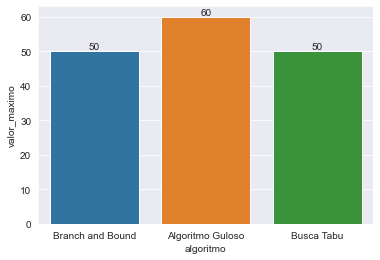

In [25]:
ax = sns.barplot(x="algoritmo", y="valor_maximo", data=estatisticas)
ax.bar_label(ax.containers[0])
ax

Composição da mochila

<AxesSubplot:xlabel='algoritmo'>

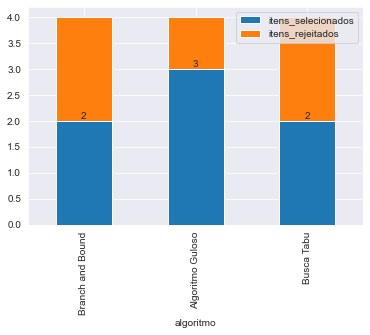

In [26]:
estatisticas_composicao = estatisticas.filter(["algoritmo", "itens_selecionados", "itens_rejeitados"])
estatisticas_composicao.set_index("algoritmo", inplace=True)
ax = estatisticas_composicao.plot(kind='bar', stacked=True)
ax.bar_label(ax.containers[0])
ax

Tempo de processamento

<AxesSubplot:xlabel='tempo_processamento', ylabel='algoritmo'>

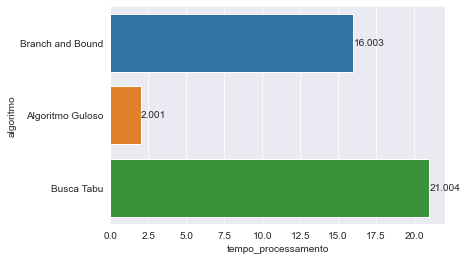

In [27]:
ax = sns.barplot(x="tempo_processamento", y="algoritmo", data=estatisticas, orient="h")
ax.bar_label(ax.containers[0])
ax

In [28]:
from ortools.algorithms import pywrapknapsack_solver


def main():
    # Create the solver.
    solver = pywrapknapsack_solver.KnapsackSolver(
        pywrapknapsack_solver.KnapsackSolver.
        KNAPSACK_MULTIDIMENSION_BRANCH_AND_BOUND_SOLVER, 'KnapsackExample')

    values = [
        360, 83, 59, 130, 431, 67, 230, 52, 93, 125, 670, 892, 600, 38, 48, 147,
        78, 256, 63, 17, 120, 164, 432, 35, 92, 110, 22, 42, 50, 323, 514, 28,
        87, 73, 78, 15, 26, 78, 210, 36, 85, 189, 274, 43, 33, 10, 19, 389, 276,
        312
    ]
    weights = [[
        7, 0, 30, 22, 80, 94, 11, 81, 70, 64, 59, 18, 0, 36, 3, 8, 15, 42, 9, 0,
        42, 47, 52, 32, 26, 48, 55, 6, 29, 84, 2, 4, 18, 56, 7, 29, 93, 44, 71,
        3, 86, 66, 31, 65, 0, 79, 20, 65, 52, 13
    ]]
    capacities = [850]

    solver.Init(values, weights, capacities)
    computed_value = solver.Solve()

    packed_items = []
    packed_weights = []
    total_weight = 0
    print('Total value =', computed_value)
    for i in range(len(values)):
        if solver.BestSolutionContains(i):
            packed_items.append(i)
            packed_weights.append(weights[0][i])
            total_weight += weights[0][i]
    print('Total weight:', total_weight)
    print('Packed items:', packed_items)
    print('Packed_weights:', packed_weights)


main()

ModuleNotFoundError: No module named 'ortools.algorithms'; 'ortools' is not a package